In [332]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [333]:
K = 3 # number of clusters
phi = np.array([ 1/K ] * K) # prior (symmetric) distribution for cluster assignment
w = np.zeros((x.shape[0], K)) # weight matrix for p(x|z,μ,σ)
tol = 1e-8 # convergence threshold of data likelihood
max_iterations = 1000 # max iterations if convergence threshold is not met
likelihood = np.iinfo(np.int32).max # initial value for data likelihood

true_mu = [1, 10, 20] # true μ
true_sigma = [1, 1.8, 2.5] # true σ

mu = [5, 14, 25] # initial guess of μ
sigma = [1.5] * 3 # initial guess of σ

In [334]:
x_list = []
for m, s in zip(true_mu, true_sigma):
    x_list.append(np.random.normal(m, s, 100)) # sample data from the true posterior
x = np.concatenate(x_list)
np.random.shuffle(x) # randomly shuffle the data

In [335]:
def plot_clusters(true_mu, true_sigma, mu, sigma, x_list, x_color=False):
    """
    Plot true and estimated distribution.
    """
    labels = []
    plt.figure(figsize=(10, 8))
    for i, (true_m, true_s, m, s) in enumerate(zip(true_mu, true_sigma, mu, sigma)):
        _x = np.linspace(true_m - 3*true_s, true_m + 3*true_s, 100)
        sample = stats.norm.pdf(_x, true_m, true_s)
        l, = plt.plot(_x, sample, color="C" + str(i), alpha=.3, label="Cluster {} μ = {}, σ = {}".format(i, round(true_m, 2), round(true_s, 2)))
        plt.plot([true_m, true_m], [0, np.max(sample)], "C" + str(i), "k-", alpha=.3, lw=1)
        labels.append(l)
        _x = np.linspace(m - 3*s, m + 3*s, 100)
        sample = stats.norm.pdf(_x, m, s)
        l, = plt.plot(_x, sample, color="C" + str(i), alpha=1, label="Cluster {} estimate μ = {}, σ = {}".format(i, round(m, 2), round(s, 2)))
        plt.plot([m, m], [0, np.max(sample)], "C" + str(i), "k-", alpha=1, lw=1)
        labels.append(l)
        if x_color is True:
            plt.plot(x_list[i], [0] * len(x_list[i]), "|", color="C" + str(i))
        else:
            plt.plot(x_list[i], [0] * len(x_list[i]), "|", color="black", alpha=.8)
    plt.legend()

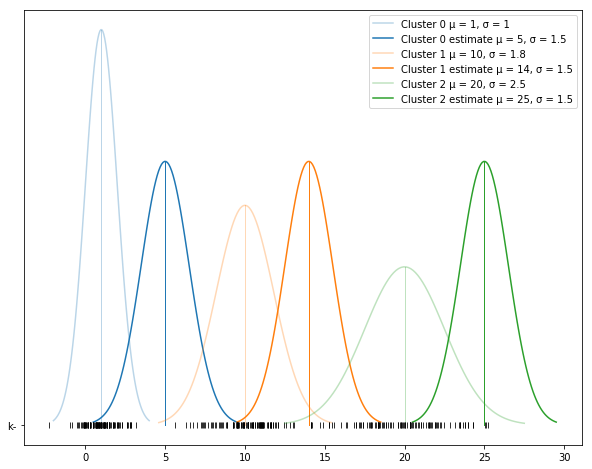

In [336]:
plot_clusters(true_mu, true_sigma, mu, sigma, x_list, x_color=False)

In [337]:
for iteration in range(max_iterations):
    #for i in range(len(x)):
        #for k in range(K):
        #    w[i][k] = stats.norm.pdf(x[i], mu[k], sigma[k])
        #w[i] = stats.norm.pdf(x[i], mu, sigma)
        #w[i] = w[i] / np.sum(w[i])
    for k in range(K):
        w[:,k] = phi[k] * stats.norm.pdf(x, mu[k], sigma[k])
    w = w / w.sum(axis=1, keepdims=True)
    phi = w.mean(axis=0)
    for k in range(K):
        norm = w[:,k].sum()
        mu[k] = w[:,k].dot(x) / norm
        sigma[k] = np.sqrt(w[:,k].dot((x - mu[k])**2) / norm)
    _likelihood = np.log(w.max(axis=1)).sum()
    print("Likelihood Iteration {}: {}".format(iteration, _likelihood))
    if np.abs(_likelihood - likelihood) <= tol:
        break
    likelihood  = _likelihood

Likelihood Iteration 0: -13.147666579728499
Likelihood Iteration 1: -34.546779080062485
Likelihood Iteration 2: -34.05583303429464
Likelihood Iteration 3: -27.00159489590927
Likelihood Iteration 4: -18.818707457599537
Likelihood Iteration 5: -14.942048709124649
Likelihood Iteration 6: -11.682918950312882
Likelihood Iteration 7: -7.8006796858365
Likelihood Iteration 8: -5.228629226773597
Likelihood Iteration 9: -4.386546999227757
Likelihood Iteration 10: -3.6202039046660217
Likelihood Iteration 11: -3.433486922847057
Likelihood Iteration 12: -3.3625769574582716
Likelihood Iteration 13: -3.619059262475276
Likelihood Iteration 14: -3.870073580914978
Likelihood Iteration 15: -3.7385164777025413
Likelihood Iteration 16: -3.563378047371489
Likelihood Iteration 17: -3.462028541946939
Likelihood Iteration 18: -3.4022941797946666
Likelihood Iteration 19: -3.3666069601693405
Likelihood Iteration 20: -3.3450849580717845
Likelihood Iteration 21: -3.3320243766228836
Likelihood Iteration 22: -3.3240

In [338]:
for iteration in range(max_iterations):
    
    ### E-Step ###
    for k in range(K):
        w[:,k] = phi[k] * stats.norm.pdf(x, mu[k], sigma[k]) # update p(x|z,μ,σ)
    w = w / w.sum(axis=1, keepdims=True) # normalize weight matrix
    
    ### M-Step ###
    phi = w.mean(axis=0) # update initial prior distribution of cluster assignment
    for k in range(K):
        norm = w[:,k].sum() # compute the norm factor of each cluster (pseudo count of assignments based on weight matrix)
        mu[k] = w[:,k].dot(x) / norm # update μ
        sigma[k] = np.sqrt(w[:,k].dot((x - mu[k])**2) / norm) # update σ
        
    ### compute data likelihood ###
    _likelihood = np.log(w.max(axis=1)).sum()
    print("Likelihood Iteration {}: {}".format(iteration, _likelihood))
    if np.abs(_likelihood - likelihood) <= tol: # check convergence
        break
    likelihood  = _likelihood

Likelihood Iteration 0: -3.3115246153289237
Likelihood Iteration 1: -3.31152461195202


In [339]:
for i, (m, s) in enumerate(zip(mu, sigma)):
    print("Cluster {}: mean {}, sigma {}".format(i,m,s))

Cluster 0: mean 0.9614108232334864, sigma 0.9418689064456418
Cluster 1: mean 10.06138280663027, sigma 1.6660154368806634
Cluster 2: mean 19.77479651756873, sigma 2.684003394045437


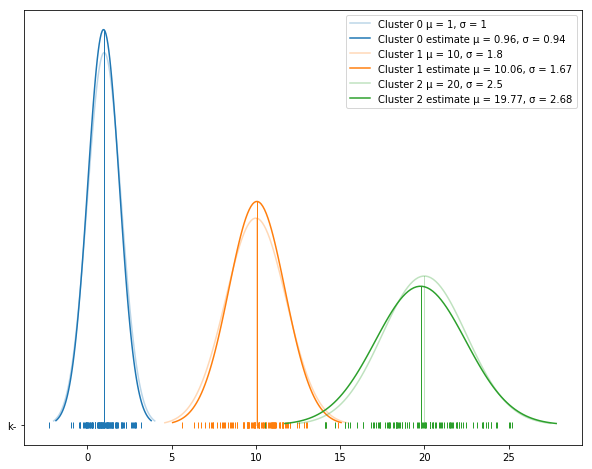

In [340]:
plot_clusters(true_mu, true_sigma, mu, sigma, x_list, x_color=True)